<b>Course:</b> COSC2789 - Practical Data Science <br>
<b>Student:</b> Vu Anh Tu (s3685121) <br>
<b>Lecturer:</b> Dr. Nhi Vo <br>
<b>Submission date:</b> 04/01/2021

<h1 style="color:#000066"><center> Assignment 2: Data Modelling </center></h1>

In this assignment we are going to explore a dataset scraped from Goodreads website. Goodreads is a platform where peole can rate and review books they have read and get recommendations based on their reading interest and behavior.

By exploring the books in Goodreads data system, we can help authors and publishers determine which kinds of books are more likely to receive high rating by readers.

In this notebook, we are going to process the datasets with the following steps: <br>
1. Import and clean the datasets
2. Do some data explorations to gain initial insights from the features
3. Do feature engineering: extract new features, transform necessary columns and select which features to build models from
4. Build models to predict a book's average rating from the selected features

<h2 style="color:#104E8B"> Task 1.1: Data Preparation </h2>

<h3 style="color:#0EBFE9">Import data</h3>

In [2]:
# Mount google drive
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load datasets
X_train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/X_train.csv')
X_test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/X_test.csv')
y_train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/y_train.csv')

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41759 entries, 0 to 41758
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      41759 non-null  int64  
 1   title                   41759 non-null  object 
 2   link                    41759 non-null  object 
 3   series                  18647 non-null  object 
 4   cover_link              41273 non-null  object 
 5   author                  41759 non-null  object 
 6   author_link             41759 non-null  object 
 7   rating_count            41759 non-null  int64  
 8   review_count            41759 non-null  int64  
 9   number_of_pages         39886 non-null  float64
 10  date_published          41071 non-null  object 
 11  publisher               38866 non-null  object 
 12  original_title          31463 non-null  object 
 13  genre_and_votes         39521 non-null  object 
 14  isbn                    32284 non-null

In [6]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10440 entries, 0 to 10439
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10440 non-null  int64  
 1   title                   10440 non-null  object 
 2   link                    10440 non-null  object 
 3   series                  4672 non-null   object 
 4   cover_link              10319 non-null  object 
 5   author                  10440 non-null  object 
 6   author_link             10440 non-null  object 
 7   rating_count            10440 non-null  int64  
 8   review_count            10440 non-null  int64  
 9   number_of_pages         9983 non-null   float64
 10  date_published          10268 non-null  object 
 11  publisher               9697 non-null   object 
 12  original_title          7787 non-null   object 
 13  genre_and_votes         9838 non-null   object 
 14  isbn                    8032 non-null 

<h4>Basic data description<h4>
The X_train dataset has 41759 rows and 25 columns. We are given 41759 book samples as training data for our models. Among the 25 features, we have a mixture of value types: <br>
<ul>
  <li>Qualitative</li>
  <ul>
    <li>Nominal: title, author, etc.</li>
  </ul>
  <li>Quantitative</li>
  <ul>
    <li>Discrete: rating_count, review_count, etc</li>
    <li>Continuous: number_of_pages</li>
  </ul>
</ul>
We also have some features in text format (date_published and description). We might have to use natural language processing on description, while for date_published we could extract the date, month and year and turn them into numeric features. These will be done in feature engineering section.

The X_test has similar features to those of X_train, but only has 10440 rows. This means we are only given 10440 book samples to test on.

In [7]:
# Basic stats for X_train
X_train.describe()

,id,rating_count,review_count,number_of_pages
count,4.175900e+04,4.175900e+04,41759.000000,39886.000000
mean,1.012620e+07,1.893641e+04,1011.811729,329.366093
std,1.162310e+07,1.204193e+05,4129.329384,250.991146
min,1.000000e+00,0.000000e+00,0.000000,0.000000
25%,3.639875e+05,3.460000e+02,32.000000,211.000000
50%,6.365996e+06,2.295000e+03,164.000000,304.000000
75%,1.737325e+07,9.271000e+03,626.500000,393.000000
max,5.444299e+07,6.801077e+06,169511.000000,11095.000000


In [8]:
# Basic stats for X_test
X_test.describe()

,id,rating_count,review_count,number_of_pages,isbn13
count,1.044000e+04,1.044000e+04,10440.000000,9983.000000,7.847000e+03
mean,1.026734e+07,1.862243e+04,1017.657375,327.251227,9.773283e+12
std,1.172926e+07,9.869185e+04,3742.071556,259.859422,2.722149e+11
min,6.000000e+00,0.000000e+00,0.000000,0.000000,9.780616e+09
25%,3.583035e+05,3.210000e+02,30.000000,209.000000,9.780385e+12
50%,6.441912e+06,2.285000e+03,159.000000,304.000000,9.780747e+12
75%,1.741248e+07,9.400250e+03,607.250000,390.000000,9.781479e+12
max,5.398436e+07,2.905122e+06,102547.000000,14777.000000,9.978069e+12


<li>rating_count: the mean is higher than the median and the median is closer to the 25th quartile than the 75th quartile so the distribution is skewed right. In addition, the max is significantly higher than the 75th quartile so there might be some outliers</li>
<li>review_count: The mean is higher than than the median and the median is also closer to the 25th quartile than the 75th quartile so its distribution is skewed right. The max value is a lot higher than the 75th quartile so we also have outliers in this column</li>
<li>number_of_pages: The mean is roughly similar to the median, and the median is the same distance from the 25th and 75th quartile. This suggests the distribution closely resembles normal distribution. The max value is also significantly higher than the 75th quartile, which suggests there are outliers.</li>

In [9]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41759 entries, 0 to 41758
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              41759 non-null  int64  
 1   average_rating  41759 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 652.6 KB


In [10]:
y_train.describe()

,id,average_rating
count,4.175900e+04,41759.000000
mean,1.012620e+07,4.019979
std,1.162310e+07,0.367900
min,1.000000e+00,0.000000
25%,3.639875e+05,3.820000
50%,6.365996e+06,4.030000
75%,1.737325e+07,4.230000
max,5.444299e+07,5.000000


For y_train, we only have one label column which is "average_rating". The number of rows is 41759 which matches X_train. We see that the average rating has the mean and median roughly the same, and the median has the same distance from the 25th and 75th quartile. This suggests the distribution resembles normal distribution.

<h4>Features description<h4>

<ul>
  <li>id: id number to identify the book on Goodreads</li>
  <li>title: Title of the book</li>
  <li>link: Link to the book on Goodreads</li>
  <li>series: Series that the book is in</li>
  <li>cover_link: Link to the cover image of the book</li>
  <li>author: Author of the book</li>
  <li>author_link: Link to the author's information page on Goodreads</li>
  <li>rating_count: Number of ratings of the book</li>
  <li>review_count: Number of reviews of the book</li>
  <li>numer_of_pages: Number of pages of the book</li>
  <li>date_published: The date when the book got published</li>
  <li>publiser: The publisher that published the book</li>
  <li>original_title: The book's first title before any change</li>
  <li>genre_and_votes: List of genres that the book is categorized in followed by number of users who put the book in that genre</li>
  <li>isbn: International Standard Book Number. A 10-digit number used to identify a book</li>
  <li>isbn13: Similar to isbn but has 13 digits (changed in 2007)</li>
  <li>asin: Amazon Standard Identification Number. A 10-character identifier used by Amazon to identify its products/books</li>
  <li>settings: Where the book's plot takes place</li>
  <li>characters: Names of characters in the book</li>
  <li>awards: List of awards the book won</li>
  <li>amazon_redirect_link: Link to the book on Amazon</li>
  <li>wordlcat_redirect_link: Link to the book on WorldCat</li>
  <li>recommended_books: list of id's of the books recommended by Goodreads based on the current book</li>
  <li>books_in_series: id's of the books in the same series as the current one</li>
  <li>description: The book's description</li>
</ul>

<h3 style="color:#0EBFE9">Clean y_train</h3>

In [11]:
y_train

,id,average_rating
0,2533958,3.62
1,16071790,3.80
2,13825165,3.55
3,18061,4.24
4,3766428,4.33
...,...,...
41754,18005647,4.31
41755,40470,4.10
41756,28009303,4.31
41757,220826,4.45


In [12]:
# Check if id columns of X_train and y_train match
len(set(y_train['id']).intersection(set(X_train['id'])))

41759

The result shows that the id's on both sets match, so we can assume there is no missing or redundant id number from both side.

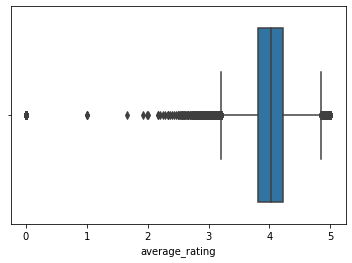

In [13]:
# Draw a boxplot for average_rating
sns.boxplot(x=y_train['average_rating'])

In [14]:
# Check if average_rating is between 0 and 5
y_train.loc[(y_train['average_rating'] < 0) | (y_train['average_rating'] > 5)]

,id,average_rating


All ratings are within the accepted range.

<h3 style="color:#0EBFE9">Clean X_train and X_test</h3>

<h4>Drop unnecessary columns</h4>

In [15]:
del X_train['link']
del X_train['cover_link']
del X_train['author_link']
del X_train['amazon_redirect_link']
del X_train['worldcat_redirect_link']

del X_test['link']
del X_test['cover_link']
del X_test['author_link']
del X_test['amazon_redirect_link']
del X_test['worldcat_redirect_link']

<h4>Deal with missing values</h4>

In [16]:
# This function takes a dataframe as parameter and prints the total number and percentage of missing values for all columns
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [17]:
# Display total number and percentage of missing values for each column
missing_percentage(X_train)

,Total,Percent
asin,37605,90.05
awards,33256,79.64
settings,32473,77.76
characters,30782,73.71
books_in_series,24096,57.70
series,23112,55.35
original_title,10296,24.66
isbn13,10099,24.18
isbn,9475,22.69
recommended_books,3151,7.55


In [18]:
# Display total number and percentage of missing values for each column
missing_percentage(X_test)

,Total,Percent
asin,9358,89.64
awards,8317,79.66
settings,8211,78.65
characters,7722,73.97
books_in_series,6025,57.71
series,5768,55.25
original_title,2653,25.41
isbn13,2593,24.84
isbn,2408,23.07
recommended_books,843,8.07


We are going to drop all features with missing values above 20%. With such significant number of missing values, data imputation does not work very well and these features do not offer much value for our models later.

In [19]:
# Delete all columns with 20% values missing or more
for (columnName, columnData) in X_train.iteritems():
    percent = round(columnData.isnull().sum()/len(X_train)*100, 2)
    if (percent > 20):
        del X_train[columnName]
        
#Reprint the columns with missing values
missing_percentage(X_train)

,Total,Percent
recommended_books,3151,7.55
publisher,2893,6.93
genre_and_votes,2238,5.36
description,2071,4.96
number_of_pages,1873,4.49
date_published,688,1.65


In [20]:
# Delete all columns with 20% values missing or more
for (columnName, columnData) in X_test.iteritems():
    percent = round(columnData.isnull().sum()/len(X_test)*100, 2)
    if (percent > 20):
        del X_test[columnName]
        
#Reprint the columns with missing values
missing_percentage(X_test)

,Total,Percent
recommended_books,843,8.07
publisher,743,7.12
genre_and_votes,602,5.77
description,504,4.83
number_of_pages,457,4.38
date_published,172,1.65


Next we will check if any row has a significant number of missing values

In [21]:
# Check and print out any row with significant number of missing values
for i in range(len(X_train.index)):
    total = X_train.iloc[i].isnull().sum()
    percent = round(total/len(X_train.index)*100, 2)
    if (percent > 10):
        print('Row ' + str(i) + ': ' + str(percent))

In [22]:
# Check and print out any row with significant number of missing values
for i in range(len(X_test.index)):
    total = X_test.iloc[i].isnull().sum()
    percent = round(total/len(X_test.index)*100, 2)
    if (percent > 10):
        print('Row ' + str(i) + ': ' + str(percent))

Looks like there is none, so we are good.

<h4>Check data types</h4>

In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41759 entries, 0 to 41758
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 41759 non-null  int64  
 1   title              41759 non-null  object 
 2   author             41759 non-null  object 
 3   rating_count       41759 non-null  int64  
 4   review_count       41759 non-null  int64  
 5   number_of_pages    39886 non-null  float64
 6   date_published     41071 non-null  object 
 7   publisher          38866 non-null  object 
 8   genre_and_votes    39521 non-null  object 
 9   recommended_books  38608 non-null  object 
 10  description        39688 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 3.5+ MB


In [24]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10440 entries, 0 to 10439
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10440 non-null  int64  
 1   title              10440 non-null  object 
 2   author             10440 non-null  object 
 3   rating_count       10440 non-null  int64  
 4   review_count       10440 non-null  int64  
 5   number_of_pages    9983 non-null   float64
 6   date_published     10268 non-null  object 
 7   publisher          9697 non-null   object 
 8   genre_and_votes    9838 non-null   object 
 9   recommended_books  9597 non-null   object 
 10  description        9936 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 897.3+ KB


Looks like all features are in good format

<h4>Check for duplicated row</h4>

In [25]:
X_train[X_train.duplicated()]

,id,title,author,rating_count,review_count,number_of_pages,date_published,publisher,genre_and_votes,recommended_books,description


In [26]:
X_test[X_test.duplicated()]

,id,title,author,rating_count,review_count,number_of_pages,date_published,publisher,genre_and_votes,recommended_books,description


Looks like we do not have any duplicated book in both train and test sets. Next we proceed to check each column for X_train and X_test

<h4>id</h4>

In [27]:
# Check for any duplicated id
X_train[X_train.duplicated(['id'])]

,id,title,author,rating_count,review_count,number_of_pages,date_published,publisher,genre_and_votes,recommended_books,description


In [28]:
# Check for any duplicated id
X_test[X_test.duplicated(['id'])]

,id,title,author,rating_count,review_count,number_of_pages,date_published,publisher,genre_and_votes,recommended_books,description


We have no duplicated id

<h4>rating_count</h4>

In [29]:
# Check if there is any negative rating_count
X_train.loc[X_train['rating_count'] < 0]

,id,title,author,rating_count,review_count,number_of_pages,date_published,publisher,genre_and_votes,recommended_books,description


In [30]:
X_test.loc[X_test['rating_count'] < 0]

,id,title,author,rating_count,review_count,number_of_pages,date_published,publisher,genre_and_votes,recommended_books,description


<h4>review_count</h4>

In [31]:
# Check if there is any negative review_count
X_train.loc[X_train['review_count'] < 0]

,id,title,author,rating_count,review_count,number_of_pages,date_published,publisher,genre_and_votes,recommended_books,description


In [32]:
X_test.loc[X_test['review_count'] < 0]

,id,title,author,rating_count,review_count,number_of_pages,date_published,publisher,genre_and_votes,recommended_books,description


<h4>number_of_pages</h4>

In [33]:
# Check for negative number of pages
X_train.loc[X_train['number_of_pages'] < 0]

,id,title,author,rating_count,review_count,number_of_pages,date_published,publisher,genre_and_votes,recommended_books,description


In [34]:
X_test.loc[X_test['number_of_pages'] < 0]

,id,title,author,rating_count,review_count,number_of_pages,date_published,publisher,genre_and_votes,recommended_books,description


We notice that there are some books with 0 page. This does not make sense so we replace these with nan

In [35]:
# Replace 0 with nan
X_train['number_of_pages'] = X_train['number_of_pages'].replace(0, np.nan)
X_test['number_of_pages'] = X_test['number_of_pages'].replace(0, np.nan)

<h2 style="color:#104E8B"> Task 1.2: Data Exploration </h2>

<h3 style="color:#0EBFE9">1.2.1 review_count and rating_count</h3>

First let's see the correlation between the numeric features of our X_train dataset

In [36]:
corrMatrix = X_train.corr()
corrMatrix.style.background_gradient(cmap='Blues')

,id,rating_count,review_count,number_of_pages
id,1.000000,-0.027822,0.035255,-0.040624
rating_count,-0.027822,1.000000,0.831690,0.031407
review_count,0.035255,0.831690,1.000000,0.041213
number_of_pages,-0.040624,0.031407,0.041213,1.000000


We can observe that "review_count" and "rating_count" has significantly higher correlation compared to other pairs. In order to visualize the relationship between them, it is best to draw a scatter plot for the pair.

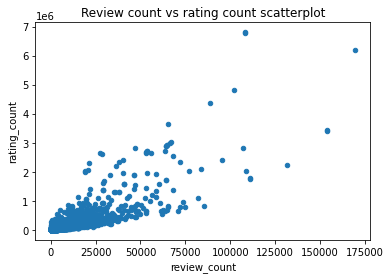

In [37]:
# Draw scatter plot of "review_count" and "rating_count"
X_train.plot(kind='scatter', x='review_count', y='rating_count')
plt.title("Review count vs rating count scatterplot")
plt.show()

From the plot above, we can see that review_count and rating_count have a strong positive correlation. As one increases, the other will be likely to increase as well. Intuitively, this seems to make sense because if a book has a lot of ratings, it will also have a lot of reviews and vice versa.

The strong correlationn between the features also indicate that we might need to drop one when building models

<h3 style="color:#0EBFE9">1.2.2 average_rating</h3>

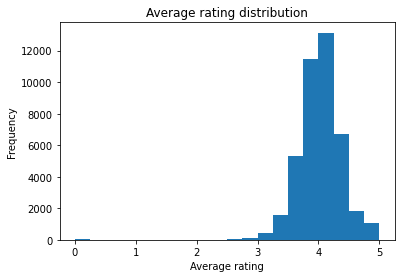

In [38]:
# Draw a histogram for "average_rating" column
y_train['average_rating'].plot(kind='hist', bins=20)
plt.title('Average rating distribution')
plt.xlabel('Average rating')
plt.ylabel('Frequency')
plt.show()

We draw a histogram to visualize this feature because average_rating is a numerical and continous value. The histogram helps us visualize the average rating distribution among all the books scraped from Goodreads website. 

As expected, the histogram has a symmetrical bell shape which resembles normal distribution. The average rating seems to center around 4.0 and interestingly, very few book have ratings lower than 3.0.

<h3 style="color:#0EBFE9">1.2.2 author and average_rating</h3>

For this section we want to find out what are the book average ratings among the most active authors (those who write the most books on Goodreads)

In [39]:
# Get the top authors with most books in the dataset
X_train['author'].value_counts().nlargest(11)

Nora Roberts       65
Agatha Christie    61
Stephen King       57
Erin Hunter        50
Lucian Bane        45
Meg Cabot          43
Bella Forrest      43
Karen Kingsbury    42
NOT A BOOK         40
Terry Pratchett    38
Enid Blyton        38
Name: author, dtype: int64

"NOT A BOOK" is obviously not a valid author name, so we will skip it and get the other 10 most active authors

In [40]:
merged_train = pd.merge(X_train, y_train, on='id')

In [41]:
# Filter the rows with the top authors above from the train dataset
active_authors = ['Nora Roberts', 'Agatha Christie', 'Stephen King', 'Erin Hunter', 'Lucian Bane', 'Meg Cabot', 'Bella Forrest', 'Karen Kingsbury', 'Terry Pratchett', 'Enid Blyton']
active_authors_df = merged_train[merged_train['author'].isin(active_authors)]

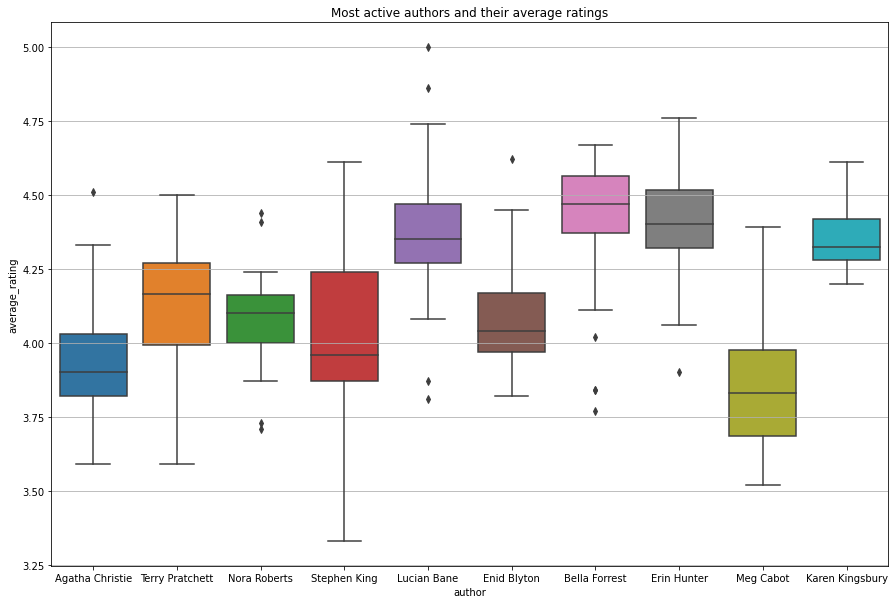

In [42]:
# Draw boxplot of the most active authors with the average rating
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.boxplot(x='author', y='average_rating', data=active_authors_df)
ax.set_title("Most active authors and their average ratings")
ax.yaxis.grid(True)

To visualize the rating distribution of an author's books and compare that among the most active authors, we draw multiple boxplots as the figure above.

As expected, the most active authors have very high ratings from their books. There are also a lot of variations among the authors. If we only focus from the 25th to 75th quartile, we see that author Beela Forrest has the highest distribution for half of her book ratings, while Meg Cabot has the lowest. If we include the max and min values, author Erin Hunter has the highest book rating just above 4.75 while Stephen King has the lowest (around 3.3). However, if we also count the outliers, we see that Lucian Bane has 2 highest rating book, 1 at 5 and the other around 4.9.

<h2 style="color:#104E8B"> Task 2: Feature Engineering </h2>

<h3 style="color:#0EBFE9">2.1 Extract potential features</h3>

<h4>Process "date_published"</h4>

Right now the published date is a string column with multiple date formats. We will try to create 3 numeric features called "publication_date", "publication_month" and "publication_year" from this column. These features will be more useful for modelling later

In [43]:
# Create new columns
X_train.insert(6, 'publication_date', np.nan)
X_train.insert(7, 'publication_month', np.nan)
X_train.insert(8, 'publication_year', np.nan)
X_train['publication_date'] = X_train['publication_date'].astype('Int64')
X_train['publication_month'] = X_train['publication_month'].astype('Int64')
X_train['publication_year'] = X_train['publication_year'].astype('Int64')
X_train

,id,title,author,rating_count,review_count,number_of_pages,publication_date,publication_month,publication_year,date_published,publisher,genre_and_votes,recommended_books,description
0,2533958,Frost/Nixon,David Frost,523,51,338.0,<NA>,<NA>,<NA>,December 31st 1975,MacMillan,"History 42, Nonfiction 33, Politics 28, Biogra...","13167112, 13167112, 29429295, 2074322, 3025937...",Including hilarious tales of the people he enc...
1,16071790,Just What Kind of Mother Are You?,Paula Daly,10092,1236,320.0,<NA>,<NA>,<NA>,April 28th 2013,Doubleday Canada,"Mystery 136, Fiction 122, Thriller 90, Suspens...","42614702, 42614702, 42182331, 45730306, 379129...",A searing and sinister thriller for readers wh...
2,13825165,Cafenova,S. Jane Scheyder,769,90,318.0,<NA>,<NA>,<NA>,November 17th 2010,Andres & Blanton,"Romance 52, Womens Fiction-Chick Lit 21, Chris...","89959, 89959, 59091, 1996085, 25843420, 364288...","Leaving her broken heart behind in Seattle, Ma..."
3,18061,Uncle Fred in the Springtime,P.G. Wodehouse,4200,328,288.0,<NA>,<NA>,<NA>,1939,Everyman,"Fiction 153, Humor 133, Humor-Comedy 31, Class...","17910171, 17910171, 13418137, 48839090, 390885...",Pongo Twistleton is in a state of financial em...
4,3766428,Double Share,Nathan Lowell,4212,184,308.0,<NA>,<NA>,<NA>,2008,Podiobooks,"Science Fiction 120, Space-Space Opera 37, Fic...","53172544, 53172544, 20951387, 52856493, 444219...","In his first assignment as an officer, Ishmael..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41754,18005647,Die KÃ¤nguru-Offenbarung,Marc-Uwe Kling,3880,157,8.0,<NA>,<NA>,<NA>,March 10th 2014,HÃ¶rbuch Hamburg,"Humor 74, Audiobook 69, Fiction 50, European L...","45322884, 45322884, 35213270, 39682945, 428544...",Endlich: Es geht weiter! Nach dem Manifest fol...
41755,40470,Cities of the Plain,Cormac McCarthy,19691,1143,292.0,<NA>,<NA>,<NA>,May 12th 1998,Vintage Books,"Fiction 621, Westerns 222, Literature 91, Nove...","28721, 28721, 11761, 256008, 43822830, 77013, ...",The concluding volume of the Border trilogy. I...
41756,28009303,"Dodging Satan: My Irish/Italian, Sometimes Awe...",Kathleen Zamboni McCormick,4584,40,191.0,<NA>,<NA>,<NA>,November 18th 2015,Sand Hill Review Press,"Drama 59, Contemporary 56","44185, 44185, 30145148, 40591252, 49477148, 36...","In this humorous coming-of-age story, Bridget ..."
41757,220826,KÃ¼rk Mantolu Madonna,Sabahattin Ali,37897,2465,160.0,<NA>,<NA>,<NA>,1943,YapÄ± Kredi YayÄ±nlarÄ±,"Asian Literature-Turkish Literature 254, Ficti...","11085413, 11085413, 1838912, 27839637, 1783204...",Kimi tutkular rehberimiz olur yaÅam boyunca. ...


In [44]:
# Check missing values
X_train['date_published'].isnull().sum()

688

In [45]:
# Fill missing values in date_published with "None"
X_train['date_published'] = X_train['date_published'].fillna('None')
X_train['date_published'].isnull().sum()

0

A quick look into the column shows that a lot of the dates have the format like this: December 31st 1975. It is the month (in letters) followed by a numeric date with the postfix (st, nd, rd and th) and the year in number. Let's try to tackle those first.

In [46]:
import re
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
days = ['\d{2}', '\d{1}']
day_texts = ['st', 'nd', 'rd', 'th']
years = '\d+'

regex_list = []

for month in months:
  for day in days:
    for day_text in day_texts:
      regex_list.append(month + " " + day + day_text + " " + years)

format1 = re.compile('|'.join(regex_list))

In [47]:
# Fill in the 3 new columns for rows with format 1 (December 21st 2020)
for index, row in X_train.iterrows():
  if row['date_published'] != "None" and re.match(format1, row['date_published']):
    # Extract the date, month and year from the string
    split_string = str.split(row['date_published'])
    try:
      date = int(re.findall('\d+', split_string[1])[0])
      year = int(split_string[2])
      if split_string[0] == 'January':
        month = 1
      elif split_string[0] == 'February':
        month = 2
      elif split_string[0] == 'March':
        month = 3
      elif split_string[0] == 'April':
        month = 4
      elif split_string[0] == 'May':
        month = 5
      elif split_string[0] == 'June':
        month = 6
      elif split_string[0] == 'July':
        month = 7
      elif split_string[0] == 'August':
        month = 8
      elif split_string[0] == 'September':
        month = 9
      elif split_string[0] == 'October':
        month = 10
      elif split_string[0] == 'November':
        month = 11
      elif split_string[0] == 'December':
        month = 12
    except ValueError:
      print("Wrong date format")
    
    # Check for valid range
    if date < 1 or date > 31:
      print("out of range")
    # Fill in the columns
    X_train.loc[index, 'publication_date'] = date
    X_train.loc[index, 'publication_month'] = month
    X_train.loc[index, 'publication_year'] = year

The second most common format is a month followed by a year (December 2011). Let's tackle these next

In [48]:
# Create regex format for the second format
regex_list = []
for month in months:
  regex_list.append(month + " " + '\d{4}')

format2 = re.compile('|'.join(regex_list))

In [49]:
for index, row in X_train.iterrows():
  if row['date_published'] != "None" and re.match(format2, row['date_published']):
    # Extract the month and the year from the string
    split_string = str.split(row['date_published'])
    year = int(split_string[1])
    if split_string[0] == 'January':
      month = 1
    elif split_string[0] == 'February':
      month = 2
    elif split_string[0] == 'March':
      month = 3
    elif split_string[0] == 'April':
      month = 4
    elif split_string[0] == 'May':
      month = 5
    elif split_string[0] == 'June':
      month = 6
    elif split_string[0] == 'July':
      month = 7
    elif split_string[0] == 'August':
      month = 8
    elif split_string[0] == 'September':
      month = 9
    elif split_string[0] == 'October':
      month = 10
    elif split_string[0] == 'November':
      month = 11
    elif split_string[0] == 'December':
      month = 12
    # Fill in the columns
    X_train.loc[index, 'publication_month'] = month
    X_train.loc[index, 'publication_year'] = year

Finally we see that some dates only have a numeric year (2011). Let's put them in the publication_year column next

In [50]:
for index, row in X_train.iterrows():
  if row['date_published'] != "None":
    try:
      X_train.loc[index, 'publication_year'] = int(row['date_published'])
    except ValueError:
      continue

After filtering out the previous 3 common formats of published dates, let's see what we have left

In [51]:
for index, row in X_train.iterrows():
  if row['date_published'] != "None" and re.match(format1, row['date_published']) == None and re.match(format2, row['date_published']) == None:
    try:
      int(row['date_published'])
    except ValueError:
      print(row['date_published'], index)

January 30th -400 1549
January 23 21299
January 1st -388 41464


A negative year is still technically correct. We can assume that 2 of those books were written before year 0. Let's manually fill them in our columns

In [52]:
X_train.loc[1549, 'publication_date'] = 30
X_train.loc[1549, 'publication_month'] = 1
X_train.loc[1549, 'publication_year'] = -400

X_train.loc[21299, 'publication_date'] = 23
X_train.loc[21299, 'publication_month'] = 1

X_train.loc[41464, 'publication_date'] = 1
X_train.loc[41464, 'publication_month'] = 1
X_train.loc[41464, 'publication_year'] = -388

In [53]:
# We don't need this column anymore
del X_train['date_published']

Let's repeat the entire process for X_test

In [54]:
X_test['date_published'].isnull().sum()

172

In [55]:
# Fill missing values in date_published with "None"
X_test['date_published'] = X_test['date_published'].fillna('None')
X_test['date_published'].isnull().sum()

0

In [56]:
X_test.insert(6, 'publication_date', np.nan)
X_test.insert(7, 'publication_month', np.nan)
X_test.insert(8, 'publication_year', np.nan)
X_test['publication_date'] = X_test['publication_date'].astype('Int64')
X_test['publication_month'] = X_test['publication_month'].astype('Int64')
X_test['publication_year'] = X_test['publication_year'].astype('Int64')
X_test

,id,title,author,rating_count,review_count,number_of_pages,publication_date,publication_month,publication_year,date_published,publisher,genre_and_votes,recommended_books,description
0,6333213,The Way of the Bow,Paulo Coelho,2179,180,76.0,<NA>,<NA>,<NA>,2003,NaN,"Fiction 39, Philosophy 15, Inspirational 6, Se...","52049749, 52049749, 9242583, 50058600, 1194740...",âThe Way of the Bowâ relates the story of ...
1,493553,The Silver Child,Cliff McNish,874,84,192.0,<NA>,<NA>,<NA>,August 1st 2003,First Avenue Editions,"Fantasy 30, Young Adult 15, Science Fiction 14...","13542616, 13542616, 13274082, 16072988, 58085,...",Six children leave the comfort of their homes....
2,25574766,Il ladro di nebbia,Lavinia Petti,219,36,412.0,<NA>,<NA>,<NA>,May 21st 2015,Longanesi,"Fantasy 8, Fiction 3","9707981, 9707981, 52331839, 25663617, 22027260...",Antonio M. Fonte Ã¨ uno scrittore di enorme su...
3,133411,"Gods, Graves and Scholars: The Story of Archae...","C.W. Ceram, Sophie Wilkins, E.B. Garside",1834,145,536.0,<NA>,<NA>,<NA>,1949,Vintage,"History 241, Nonfiction 149, History-Archaeolo...","935992, 935992, 23487060, 189589, 883503, 9611...",C.W. Ceram visualized archeology as a wonderfu...
4,64279,Heaven and Hell,John Jakes,10369,222,781.0,<NA>,<NA>,<NA>,1987,Signet,"Historical-Historical Fiction 459, Fiction 194...","73062, 73062, 8716, 65959, 891922, 1503274, 16...",The last days of the Civil War bring no peace ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10435,21112453,John Green the Collection: Looking for Alaska ...,John Green,2955,54,960.0,<NA>,<NA>,<NA>,November 7th 2013,Penguin,"Fiction 9, Romance 5, Young Adult 4, Contempor...","20814047, 20814047, 294817, 13069681, 6266743,...",John Green - The Collection includes five nove...
10436,4339191,Ø¹Ø¨ÙØ±ÙØ© Ø®Ø§ÙØ¯,Ø¹Ø¨Ø§Ø³ Ù Ø­Ù ÙØ¯ Ø§ÙØ¹ÙØ§Ø¯,2149,223,152.0,<NA>,<NA>,<NA>,1945,ÙÙØ¶Ø© Ù ØµØ±,"Biography 25, History 20, Religion 16, Nonfict...","2784555, 2784555, 545425, 6048350, 3338544, 23...",ÙØ¹Ø±Ø¶ Ø§ÙÙØ§ØªØ¨ ÙÙ ÙØ°Ø§ Ø§ÙØ¹Ù Ù Ø...
10437,1793889,Transit,Anna Seghers,1490,167,290.0,<NA>,<NA>,<NA>,1944,Aufbau,"Fiction 95, European Literature-German Literat...","795699, 795699, 15805778, 5512, 370756, 40833,...",Marseille im Sommer 1940: Am Rande Europas ver...
10438,958244,The Fourth Dimension: Discovering a New World ...,"David Yonggi Cho, R. Whitney Manzano",511,39,156.0,<NA>,<NA>,<NA>,March 1st 1979,Bridge-Logos,"Christian 10, Religion-Christianity 3, Prayer ...","259319, 259319, 10316447, 917936, 364975, 1556...","Paul Yonggi Cho, pastor of the world's largest..."


In [57]:
# Fill in the 3 new columns for rows with format 1 (December 21st 2020)
for index, row in X_test.iterrows():
  if row['date_published'] != "None" and re.match(format1, row['date_published']):
    # Extract the date, month and year from the string
    split_string = str.split(row['date_published'])
    try:
      date = int(re.findall('\d+', split_string[1])[0])
      year = int(split_string[2])
      if split_string[0] == 'January':
        month = 1
      elif split_string[0] == 'February':
        month = 2
      elif split_string[0] == 'March':
        month = 3
      elif split_string[0] == 'April':
        month = 4
      elif split_string[0] == 'May':
        month = 5
      elif split_string[0] == 'June':
        month = 6
      elif split_string[0] == 'July':
        month = 7
      elif split_string[0] == 'August':
        month = 8
      elif split_string[0] == 'September':
        month = 9
      elif split_string[0] == 'October':
        month = 10
      elif split_string[0] == 'November':
        month = 11
      elif split_string[0] == 'December':
        month = 12
    except ValueError:
      print("Wrong date format")
    
    # Check for valid range
    if date < 1 or date > 31:
      print("out of range")
    # Fill in the columns
    X_test.loc[index, 'publication_date'] = date
    X_test.loc[index, 'publication_month'] = month
    X_test.loc[index, 'publication_year'] = year

In [58]:
# Fill in the 3 new columns for rows with format 2 (December 2020)
for index, row in X_test.iterrows():
  if row['date_published'] != "None" and re.match(format2, row['date_published']):
    # Extract the month and the year from the string
    split_string = str.split(row['date_published'])
    year = int(split_string[1])
    if split_string[0] == 'January':
      month = 1
    elif split_string[0] == 'February':
      month = 2
    elif split_string[0] == 'March':
      month = 3
    elif split_string[0] == 'April':
      month = 4
    elif split_string[0] == 'May':
      month = 5
    elif split_string[0] == 'June':
      month = 6
    elif split_string[0] == 'July':
      month = 7
    elif split_string[0] == 'August':
      month = 8
    elif split_string[0] == 'September':
      month = 9
    elif split_string[0] == 'October':
      month = 10
    elif split_string[0] == 'November':
      month = 11
    elif split_string[0] == 'December':
      month = 12
    # Fill in the columns
    X_test.loc[index, 'publication_month'] = month
    X_test.loc[index, 'publication_year'] = year

In [59]:
# Fill in the columns for rows with only numeric year (2020)
for index, row in X_test.iterrows():
  if row['date_published'] != "None":
    try:
      X_test.loc[index, 'publication_year'] = int(row['date_published'])
    except ValueError:
      continue

In [60]:
# Let's see what's left
for index, row in X_test.iterrows():
  if row['date_published'] != "None" and re.match(format1, row['date_published']) == None and re.match(format2, row['date_published']) == None:
    try:
      int(row['date_published'])
    except ValueError:
      print(row['date_published'], index)

14th 1857 3893


In [61]:
# Manually fill in for this date
X_test.loc[3893, 'publication_date'] = 14
X_test.loc[3893, 'publication_year'] = 1857

In [62]:
# We don't need this anymore
del X_test['date_published']

<h4>Process "genre_and_votes"</h4>

Goodreads does not automatically categorize a book but lets the readers vote on the book's genre. A reader and put a book in any of his shelf. Based on the name of these shelves, Goodreads calculate how many people put the book in each unique shelf and put them in descending other (as shown in this column). For simplicity, we will extract the first genre which is also the most voted one for that particular book 

In [63]:
X_train.insert(10, 'genre', "None")

In [64]:
# Get the first genre in "genre_and_votes" and put it in genre column
for index, row in X_train.iterrows():
  if pd.notna(X_train.loc[index, 'genre_and_votes']):
    X_train.loc[index, 'genre'] = row['genre_and_votes'].split(", ")[0].split()[-2]

In [65]:
X_test.insert(10, 'genre', "None")

In [66]:
# Get the first genre in "genre_and_votes" and put it in genre column
for index, row in X_test.iterrows():
  if pd.notna(X_test.loc[index, 'genre_and_votes']):
    X_test.loc[index, 'genre'] = row['genre_and_votes'].split(", ")[0].split()[-2]

<h4>Create "book_language" and "description_language"</h4>

Using langdetect package, we will detect the language of the book's title and description then create 2 new features called "book_language" and "description_language"

In [67]:
pip install langdetect

In [68]:
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [69]:
from langdetect import detect

In [70]:
X_train.insert(14, 'description_language', "None")

In [71]:
#Detect description's language for X_train
for index, row in X_train.iterrows():
  try:
    X_train.loc[index, 'description_language'] = detect(row['description'])
  except Exception:
    continue

In [72]:
X_test.insert(14, 'description_language', "None")

In [73]:
# Detect description's language for X_test
for index, row in X_test.iterrows():
  try:
    X_test.loc[index, 'description_language'] = detect(row['description'])
  except Exception:
    continue

In [74]:
X_train.insert(2, 'book_language', "None")

In [75]:
# Detect title's language for X_train
for index, row in X_train.iterrows():
  try:
    X_train.loc[index, 'book_language'] = detect(row['title'])
  except Exception:
    continue

In [76]:
X_test.insert(2, 'book_language', "None")

In [77]:
# Detect title's language for X_test
for index, row in X_test.iterrows():
  try:
    X_test.loc[index, 'book_language'] = detect(row['title'])
  except Exception:
    continue

<h3 style="color:#0EBFE9">2.2 Impute missing data</h3>

For simplicity, we will fill the missing values using median, mean and mode

In [78]:
X_train.isnull().sum()

id                          0
title                       0
book_language               0
author                      0
rating_count                0
review_count                0
number_of_pages          2008
publication_date        15332
publication_month       13060
publication_year          689
publisher                2893
genre                       0
genre_and_votes          2238
recommended_books        3151
description              2071
description_language        0
dtype: int64

In [79]:
# Fill missing number_of_page with mean
X_train['number_of_pages'].fillna(X_train['number_of_pages'].mean(), inplace=True)
# Fill missing dates with median
X_train['publication_date'].fillna(X_train['publication_date'].median(), inplace=True)
X_train['publication_month'].fillna(X_train['publication_month'].median(), inplace=True)
X_train['publication_year'].fillna(X_train['publication_year'].median(), inplace=True)
# Fill missing publishers with the mode
X_train['publisher'].fillna(X_train['publisher'].mode(), inplace=True)
# Fill missing description with empty space
X_train['description'] = X_train['description'].fillna("")

In [80]:
# Fill missing genres with the mode
for index, row in X_train.iterrows():
  if row['genre'] == 'None':
    X_train.loc[index, 'genre'] = 'Fiction'

In [81]:
X_test.isnull().sum()

id                         0
title                      0
book_language              0
author                     0
rating_count               0
review_count               0
number_of_pages          489
publication_date        3806
publication_month       3283
publication_year         172
publisher                743
genre                      0
genre_and_votes          602
recommended_books        843
description              504
description_language       0
dtype: int64

In [82]:
# Fill missing number_of_page with mean
X_test['number_of_pages'].fillna(X_train['number_of_pages'].mean(), inplace=True)
# Fill missing dates with median
X_test['publication_date'].fillna(X_train['publication_date'].median(), inplace=True)
X_test['publication_month'].fillna(X_train['publication_month'].median(), inplace=True)
X_test['publication_year'].fillna(X_train['publication_year'].median(), inplace=True)
# Fill missing publishers with the mode
X_test['publisher'].fillna(X_train['publisher'].mode(), inplace=True)
# Fill missing description with empty space
X_test['description'] = X_test['description'].fillna("")

In [83]:
# Fill missing genres with the mode
for index, row in X_test.iterrows():
  if row['genre'] == 'None':
    X_test.loc[index, 'genre'] = 'Fiction'

<h3 style="color:#0EBFE9">2.3 Select features</h3>

In [84]:
X_train['publication_date'] = X_train['publication_date'].astype(int)
X_train['publication_month'] = X_train['publication_month'].astype(int)
X_train['publication_year'] = X_train['publication_year'].astype(int)
X_test['publication_date'] = X_test['publication_date'].astype(int)
X_test['publication_month'] = X_test['publication_month'].astype(int)
X_test['publication_year'] = X_test['publication_year'].astype(int)

In [85]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41759 entries, 0 to 41758
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    41759 non-null  int64  
 1   title                 41759 non-null  object 
 2   book_language         41759 non-null  object 
 3   author                41759 non-null  object 
 4   rating_count          41759 non-null  int64  
 5   review_count          41759 non-null  int64  
 6   number_of_pages       41759 non-null  float64
 7   publication_date      41759 non-null  int64  
 8   publication_month     41759 non-null  int64  
 9   publication_year      41759 non-null  int64  
 10  publisher             38866 non-null  object 
 11  genre                 41759 non-null  object 
 12  genre_and_votes       39521 non-null  object 
 13  recommended_books     38608 non-null  object 
 14  description           41759 non-null  object 
 15  description_languag

In [86]:
X_train['title'].value_counts()

Legacy                           11
Broken                           11
Twisted                          10
Torn                              9
Selected Poems                    9
                                 ..
Finding Freia Lockhart            1
Age of Order                      1
The Overdue Life of Amy Byler     1
Mass Effect: Revelation           1
Come Sundown                      1
Name: title, Length: 40047, dtype: int64

In [87]:
X_train['author'].value_counts()

Nora Roberts          65
Agatha Christie       61
Stephen King          57
Erin Hunter           50
Lucian Bane           45
                      ..
Merlaine Hemstraat     1
Rosemarie Tong         1
Vanessa Place          1
Alison Gillespie       1
Annie Murray           1
Name: author, Length: 23482, dtype: int64

In [88]:
X_train['publisher'].value_counts()

Vintage                      457
HarperCollins                452
Penguin Books                413
Ballantine Books             321
Bantam                       306
                            ... 
Strebor Books                  1
OMF Literature Inc.            1
Thaning & Appel                1
Ø§ÙØ­Ø¶Ø§Ø±Ø© ÙÙÙØ´Ø±      1
Wydawnictwo Znak               1
Name: publisher, Length: 9514, dtype: int64

In [89]:
X_train['genre'].value_counts()

Fiction                  10681
Fantasy                   4878
Romance                   3527
Adult                     2811
Nonfiction                2123
                         ...  
Own                          1
Linguistics-Semiotics        1
Africa-Ethiopia              1
Prize                        1
Gender                       1
Name: genre, Length: 337, dtype: int64

First off, we see that the 4 categorical columns "title", "author", "publisher" and "genre" have way too many levels. Since we do not have any information to collapse the levels into fewer significant groups, we will skip these features

In [90]:
X_train['book_language'].value_counts()

en       27987
de        2404
da        1473
fr         793
nl         751
it         722
es         682
id         669
pt         616
af         603
tl         576
no         534
ro         502
ca         451
et         298
so         297
sv         292
cy         258
tr         253
fi         243
pl         219
sw         204
vi         168
hr         136
sl         133
lt         124
None        82
sq          65
hu          61
sk          60
cs          47
zh-cn       29
lv          23
ko           4
Name: book_language, dtype: int64

In [91]:
X_train['description_language'].value_counts()

en       35144
None      2222
da         895
es         534
pt         470
fr         429
de         409
id         332
it         228
nl         182
tr         172
ro         150
pl          91
vi          79
sv          60
hr          53
no          51
fi          44
tl          40
cs          39
lt          32
hu          29
et          22
af          16
ca          10
sk           8
sl           4
sq           4
lv           3
zh-cn        3
sw           2
so           1
ko           1
Name: description_language, dtype: int64

Secondly, we see that most book's titles and descriptions are written in English, so the 2 language columns we just created will not add much value to our models.

In conclusion, we will select the following features for our modelling tasks:
<ul>
  <li>rating_count</li>
  <li>review_count</li>
  <li>number_of_pages</li>
  <li>publication_year</li>
  <li>description</li>
</ul> 

<h2 style="color:#104E8B"> Task 3: Modelling </h2>

For this task, we will use 4 base models to analyze our dataset. Each model will do the following tasks:
<ul>
  <li>Base model 1: Predict the average rating based on tf-idf matrices converted from description column</li>
  <li>Base model 2: Predict the average rating by analyzing the numeric features rating_count, review_count, number_of_pages and publication_year</li>
  <li>Base model 3: Analyze description column based on lexicon and predict the average rating</li>
  <li>Base model 4: Using sentiment to analyze description column and predict the average rating</li>
</ul>

For each base model, we will try the 4 most popular and effective algorithms in machine learning:
<ul>
  <li>XGBoost</li>
  <li>Random forest</li>
  <li>Bayesian Ridge</li>
  <li>CatBoost</li>
</ul>

Then we will stack these models and create another model in the next layer. This model will optimally combine all the predictions of the base models in order to produce a new set of predictions for average rating. The chosen algorithm for each base model will be based on the best RMSE score, and we will also try to vary the algorithms to optimize our prediction.

<h3 style="color:#0EBFE9">3.1 Base model 1: TF-IDF</h3>

In [92]:
# Create a data frame with selected features to train from X_train
X_train_selected = X_train[['rating_count', 'review_count', 'number_of_pages', 'publication_year', 'description']]
X_train_selected

,rating_count,review_count,number_of_pages,publication_year,description
0,523,51,338.0,1975,Including hilarious tales of the people he enc...
1,10092,1236,320.0,2013,A searing and sinister thriller for readers wh...
2,769,90,318.0,2010,"Leaving her broken heart behind in Seattle, Ma..."
3,4200,328,288.0,1939,Pongo Twistleton is in a state of financial em...
4,4212,184,308.0,2008,"In his first assignment as an officer, Ishmael..."
...,...,...,...,...,...
41754,3880,157,8.0,2014,Endlich: Es geht weiter! Nach dem Manifest fol...
41755,19691,1143,292.0,1998,The concluding volume of the Border trilogy. I...
41756,4584,40,191.0,2015,"In this humorous coming-of-age story, Bridget ..."
41757,37897,2465,160.0,1943,Kimi tutkular rehberimiz olur yaÅam boyunca. ...


In [93]:
# Create a data frame with selected features to train from X_test
X_test_selected = X_test[['rating_count', 'review_count', 'number_of_pages', 'publication_year', 'description']]
X_test_selected

,rating_count,review_count,number_of_pages,publication_year,description
0,2179,180,76.0,2003,âThe Way of the Bowâ relates the story of ...
1,874,84,192.0,2003,Six children leave the comfort of their homes....
2,219,36,412.0,2015,Antonio M. Fonte Ã¨ uno scrittore di enorme su...
3,1834,145,536.0,1949,C.W. Ceram visualized archeology as a wonderfu...
4,10369,222,781.0,1987,The last days of the Civil War bring no peace ...
...,...,...,...,...,...
10435,2955,54,960.0,2013,John Green - The Collection includes five nove...
10436,2149,223,152.0,1945,ÙØ¹Ø±Ø¶ Ø§ÙÙØ§ØªØ¨ ÙÙ ÙØ°Ø§ Ø§ÙØ¹Ù Ù Ø...
10437,1490,167,290.0,1944,Marseille im Sommer 1940: Am Rande Europas ver...
10438,511,39,156.0,1979,"Paul Yonggi Cho, pastor of the world's largest..."


In [94]:
# train/val split with scikit-learn
from sklearn.model_selection import train_test_split

train_set_x, val_set_x, train_set_y, val_set_y = train_test_split(X_train_selected, y_train['average_rating'], test_size=0.2, random_state=0, shuffle=True)

In [95]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2, 2))

In [97]:
# use fit_transform with the train set
X_train_tfidf = vectorizer.fit_transform(train_set_x['description'])
# only call the transform with the val/test set, don't fit it again
X_val_tfidf = vectorizer.transform(val_set_x['description'])
X_test_tfidf = vectorizer.transform(X_test['description'])

In [98]:
# we pick out the TF-IDF features that appears in more than 1000 rows
X_train_tfidf = X_train_tfidf[:, X_train_tfidf.getnnz(0) > 1000] 
# IMPORTANT, you have to use the frequency index from the X_train_tfidf.getnnz(0) for both sets
X_val_tfidf = X_val_tfidf[:, X_train_tfidf.getnnz(0) > 1000]
X_test_tfidf = X_test_tfidf[:, X_train_tfidf.getnnz(0) > 1000]

In [99]:
import xgboost
import sklearn.metrics as metrics

In [100]:
%%time
model = xgboost.XGBRegressor()
model = model.fit(X_train_tfidf, train_set_y)
# Make predictions using the train/val set
Y_pred_train_1_xgb = model.predict(X_train_tfidf)
Y_pred_val_1_xgb = model.predict(X_val_tfidf)
Y_pred_test_1_xgb = model.predict(X_test_tfidf)
# The mean squared error
print('Val RSME: %.4f' % np.sqrt(metrics.mean_squared_error(val_set_y, Y_pred_val_1_xgb)))
print('Val MAE: %.4f' % metrics.mean_absolute_error(val_set_y, Y_pred_val_1_xgb))
print('Val r2: %.4f' % metrics.r2_score(val_set_y, Y_pred_val_1_xgb))

[16:44:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Val RSME: 0.3822
Val MAE: 0.2645
Val r2: -0.0005
CPU times: user 3.3 s, sys: 19 ms, total: 3.32 s
Wall time: 3.39 s


In [101]:
%%time
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train_tfidf, train_set_y)
# Make predictions
Y_pred_train_1_rf = regr.predict(X_train_tfidf)
Y_pred_val_1_rf = regr.predict(X_val_tfidf)
Y_pred_test_1_rf = regr.predict(X_test_tfidf)
# Evaluation metrics
print('Val RSME: %.4f' % np.sqrt(metrics.mean_squared_error(val_set_y, Y_pred_val_1_rf)))
print('Val MAE: %.4f' % metrics.mean_absolute_error(val_set_y, Y_pred_val_1_rf))
print('Val r2: %.4f' % metrics.r2_score(val_set_y, Y_pred_val_1_rf))

Val RSME: 0.3822
Val MAE: 0.2644
Val r2: -0.0002
CPU times: user 4.13 s, sys: 12.9 ms, total: 4.15 s
Wall time: 4.24 s


In [102]:
%%time
from sklearn import linear_model
clf = linear_model.BayesianRidge()
clf.fit(X_train_tfidf.toarray(), train_set_y)
# Make predictions
Y_pred_train_1_bayes = clf.predict(X_train_tfidf.toarray())
Y_pred_val_1_bayes = clf.predict(X_val_tfidf.toarray())
Y_pred_test_1_bayes = clf.predict(X_test_tfidf.toarray())
# Evaluation metrics
print('Val RSME: %.4f' % np.sqrt(metrics.mean_squared_error(val_set_y, Y_pred_val_1_bayes)))
print('Val MAE: %.4f' % metrics.mean_absolute_error(val_set_y, Y_pred_val_1_bayes))
print('Val r2: %.4f' % metrics.r2_score(val_set_y, Y_pred_val_1_bayes))

Val RSME: 0.3823
Val MAE: 0.2647
Val r2: -0.0008
CPU times: user 763 ms, sys: 173 ms, total: 936 ms
Wall time: 502 ms


In [103]:
pip install catboost

     |████████████████████████████████| 65.8MB 64kB/s 


In [104]:
%%time
from catboost import CatBoostRegressor
model = CatBoostRegressor()
model.fit(X_train_tfidf, train_set_y)
# Make predictions
Y_pred_train_1_cat = model.predict(X_train_tfidf)
Y_pred_val_1_cat = model.predict(X_val_tfidf)
Y_pred_test_1_cat = model.predict(X_test_tfidf)
# Evaluation metrics
print('Val RSME: %.4f' % np.sqrt(metrics.mean_squared_error(val_set_y, Y_pred_val_1_cat)))
print('Val MAE: %.4f' % metrics.mean_absolute_error(val_set_y, Y_pred_val_1_cat))
print('Val r2: %.4f' % metrics.r2_score(val_set_y, Y_pred_val_1_cat))

Learning rate set to 0.072886
0:	learn: 0.3639419	total: 103ms	remaining: 1m 43s
1:	learn: 0.3637212	total: 144ms	remaining: 1m 11s
2:	learn: 0.3635556	total: 185ms	remaining: 1m 1s
3:	learn: 0.3633816	total: 229ms	remaining: 57s
4:	learn: 0.3632324	total: 269ms	remaining: 53.6s
5:	learn: 0.3630790	total: 310ms	remaining: 51.4s
6:	learn: 0.3629511	total: 349ms	remaining: 49.5s
7:	learn: 0.3627961	total: 386ms	remaining: 47.9s
8:	learn: 0.3627655	total: 423ms	remaining: 46.6s
9:	learn: 0.3626760	total: 464ms	remaining: 46s
10:	learn: 0.3625575	total: 503ms	remaining: 45.2s
11:	learn: 0.3624616	total: 540ms	remaining: 44.5s
12:	learn: 0.3624086	total: 581ms	remaining: 44.1s
13:	learn: 0.3623045	total: 620ms	remaining: 43.6s
14:	learn: 0.3622529	total: 657ms	remaining: 43.1s
15:	learn: 0.3622264	total: 698ms	remaining: 42.9s
16:	learn: 0.3621508	total: 736ms	remaining: 42.6s
17:	learn: 0.3620883	total: 773ms	remaining: 42.2s
18:	learn: 0.3619769	total: 813ms	remaining: 42s
19:	learn: 0.36

<h3 style="color:#0EBFE9">3.2 Base model 2: Basic features</h3>

In [105]:
basic_features_train = train_set_x.copy()
del basic_features_train['description']

In [106]:
basic_features_val = val_set_x.copy()
del basic_features_val['description']

In [107]:
basic_features_test = X_test_selected.copy()
del basic_features_test['description']

In [108]:
# Basic features
%%time
model = xgboost.XGBRegressor()
model = model.fit(basic_features_train, train_set_y)
# Make predictions using the train/val set
Y_pred_train_2_xgb = model.predict(basic_features_train)
Y_pred_val_2_xgb = model.predict(basic_features_val)
Y_pred_test_2_xgb = model.predict(basic_features_test)

# The mean squared error
print('Val RSME: %.4f' % np.sqrt(metrics.mean_squared_error(val_set_y, Y_pred_val_2_xgb)))
print('Val MAE: %.4f' % metrics.mean_absolute_error(val_set_y, Y_pred_val_2_xgb))
print('Val r2: %.4f' % metrics.r2_score(val_set_y, Y_pred_val_2_xgb))

[16:45:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Val RSME: 0.3015
Val MAE: 0.2292
Val r2: 0.3776
CPU times: user 1.3 s, sys: 6.99 ms, total: 1.31 s
Wall time: 1.31 s


In [109]:
%%time
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=17, random_state=0)
regr.fit(basic_features_train, train_set_y)
# Make predictions
Y_pred_train_2_rf = regr.predict(basic_features_train)
Y_pred_val_2_rf = regr.predict(basic_features_val)
Y_pred_test_2_rf = regr.predict(basic_features_test)
# Evaluation metrics
print('Val RSME: %.4f' % np.sqrt(metrics.mean_squared_error(val_set_y, Y_pred_val_2_rf)))
print('Val MAE: %.4f' % metrics.mean_absolute_error(val_set_y, Y_pred_val_2_rf))
print('Val r2: %.4f' % metrics.r2_score(val_set_y, Y_pred_val_2_rf))

Val RSME: 0.3039
Val MAE: 0.2258
Val r2: 0.3675
CPU times: user 11.9 s, sys: 26.9 ms, total: 11.9 s
Wall time: 12 s


In [110]:
%%time
from sklearn import linear_model
clf = linear_model.BayesianRidge()
clf.fit(basic_features_train, train_set_y)
# Make predictions
Y_pred_train_2_bayes = clf.predict(basic_features_train)
Y_pred_val_2_bayes = clf.predict(basic_features_val)
Y_pred_test_2_bayes = clf.predict(basic_features_test)
# Evaluation metrics
print('Val RSME: %.4f' % np.sqrt(metrics.mean_squared_error(val_set_y, Y_pred_val_2_bayes)))
print('Val MAE: %.4f' % metrics.mean_absolute_error(val_set_y, Y_pred_val_2_bayes))
print('Val r2: %.4f' % metrics.r2_score(val_set_y, Y_pred_val_2_bayes))

Val RSME: 0.3798
Val MAE: 0.2613
Val r2: 0.0121
CPU times: user 15.1 ms, sys: 16 ms, total: 31.1 ms
Wall time: 18.3 ms


In [111]:
%%time
from catboost import CatBoostRegressor
model = CatBoostRegressor()
model.fit(basic_features_train, train_set_y)
# Make predictions
Y_pred_train_2_cat = model.predict(basic_features_train)
Y_pred_val_2_cat = model.predict(basic_features_val)
Y_pred_test_2_cat = model.predict(basic_features_test)
# Evaluation metrics
print('Val RSME: %.4f' % np.sqrt(metrics.mean_squared_error(val_set_y, Y_pred_val_2_cat)))
print('Val MAE: %.4f' % metrics.mean_absolute_error(val_set_y, Y_pred_val_2_cat))
print('Val r2: %.4f' % metrics.r2_score(val_set_y, Y_pred_val_2_cat))

Learning rate set to 0.072886
0:	learn: 0.3621907	total: 15.9ms	remaining: 15.8s
1:	learn: 0.3605177	total: 33.3ms	remaining: 16.6s
2:	learn: 0.3589634	total: 50.8ms	remaining: 16.9s
3:	learn: 0.3574273	total: 64.4ms	remaining: 16s
4:	learn: 0.3562126	total: 70.8ms	remaining: 14.1s
5:	learn: 0.3550155	total: 76.5ms	remaining: 12.7s
6:	learn: 0.3539795	total: 82.2ms	remaining: 11.7s
7:	learn: 0.3527192	total: 87.6ms	remaining: 10.9s
8:	learn: 0.3516517	total: 93ms	remaining: 10.2s
9:	learn: 0.3506879	total: 98.6ms	remaining: 9.76s
10:	learn: 0.3497883	total: 104ms	remaining: 9.36s
11:	learn: 0.3491560	total: 112ms	remaining: 9.26s
12:	learn: 0.3485145	total: 119ms	remaining: 9.06s
13:	learn: 0.3478270	total: 125ms	remaining: 8.81s
14:	learn: 0.3471506	total: 131ms	remaining: 8.58s
15:	learn: 0.3466138	total: 136ms	remaining: 8.39s
16:	learn: 0.3460694	total: 145ms	remaining: 8.41s
17:	learn: 0.3457288	total: 151ms	remaining: 8.26s
18:	learn: 0.3453205	total: 157ms	remaining: 8.1s
19:	le

<h3 style="color:#0EBFE9">3.3 Base model 3: Lexicon</h3>

In [112]:
!pip install empath

     |████████████████████████████████| 61kB 5.4MB/s 
  Created wheel for empath: filename=empath-0.89-cp36-none-any.whl size=57823 sha256=1162200e610b6233422e5622853b48c64362a636c292806cddf71ed71373cb7f
  Stored in directory: /root/.cache/pip/wheels/84/ea/2f/2bc54d4f9985ce61753ebc5b00cb2df51d855589267c667308
Successfully built empath


In [113]:
# Lexicon
from empath import Empath
lexicon = Empath()

# process train set
X_train_empath = train_set_x['description'].apply(lambda x: lexicon.analyze(x))
X_train_empath = pd.DataFrame.from_dict(dict(X_train_empath))
X_train_empath = X_train_empath.T

# process val set
X_val_empath = val_set_x['description'].apply(lambda x: lexicon.analyze(x))
X_val_empath = pd.DataFrame.from_dict(dict(X_val_empath))
X_val_empath = X_val_empath.T

# process test set
X_test_empath = X_test['description'].apply(lambda x: lexicon.analyze(x))
X_test_empath = pd.DataFrame.from_dict(dict(X_test_empath))
X_test_empath = X_test_empath.T

In [114]:
%%time
model = xgboost.XGBRegressor()
model = model.fit(X_train_empath, train_set_y)
# Make predictions using the train/val set
Y_pred_train_3_xgb = model.predict(X_train_empath)
Y_pred_val_3_xgb = model.predict(X_val_empath)
Y_pred_test_3_xgb = model.predict(X_test_empath)
# The mean squared error
print('Val RSME: %.4f' % np.sqrt(metrics.mean_squared_error(val_set_y, Y_pred_val_3_xgb)))
print('Val MAE: %.4f' % metrics.mean_absolute_error(val_set_y, Y_pred_val_3_xgb))
print('Val r2: %.4f' % metrics.r2_score(val_set_y, Y_pred_val_3_xgb))

[16:54:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Val RSME: 0.3798
Val MAE: 0.2606
Val r2: 0.0121
CPU times: user 12.5 s, sys: 118 ms, total: 12.6 s
Wall time: 12.6 s


In [115]:
%%time
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=25, random_state=0)
regr.fit(X_train_empath, train_set_y)
# Make predictions
Y_pred_train_3_rf = regr.predict(X_train_empath)
Y_pred_val_3_rf = regr.predict(X_val_empath)
Y_pred_test_3_rf = regr.predict(X_test_empath)
# Evaluation metrics
print('Val RSME: %.4f' % np.sqrt(metrics.mean_squared_error(val_set_y, Y_pred_val_3_rf)))
print('Val MAE: %.4f' % metrics.mean_absolute_error(val_set_y, Y_pred_val_3_rf))
print('Val r2: %.4f' % metrics.r2_score(val_set_y, Y_pred_val_3_rf))

Val RSME: 0.3784
Val MAE: 0.2591
Val r2: 0.0196
CPU times: user 2min 19s, sys: 46.5 ms, total: 2min 19s
Wall time: 2min 19s


In [116]:
%%time
from sklearn import linear_model
clf = linear_model.BayesianRidge()
clf.fit(X_train_empath, train_set_y)
# Make predictions
Y_pred_train_3_bayes = clf.predict(X_train_empath)
Y_pred_val_3_bayes = clf.predict(X_val_empath)
Y_pred_test_3_bayes = clf.predict(X_test_empath)
# Evaluation metrics
print('Val RSME: %.4f' % np.sqrt(metrics.mean_squared_error(val_set_y, Y_pred_val_3_bayes)))
print('Val MAE: %.4f' % metrics.mean_absolute_error(val_set_y, Y_pred_val_3_bayes))
print('Val r2: %.4f' % metrics.r2_score(val_set_y, Y_pred_val_3_bayes))

Val RSME: 0.3785
Val MAE: 0.2597
Val r2: 0.0191
CPU times: user 1.41 s, sys: 267 ms, total: 1.68 s
Wall time: 872 ms


In [117]:
%%time
from catboost import CatBoostRegressor
model = CatBoostRegressor()
model.fit(X_train_empath, train_set_y)
# Make predictions
Y_pred_train_3_cat = model.predict(X_train_empath)
Y_pred_val_3_cat = model.predict(X_val_empath)
Y_pred_test_3_cat = model.predict(X_test_empath)
# Evaluation metrics
print('Val RSME: %.4f' % np.sqrt(metrics.mean_squared_error(val_set_y, Y_pred_val_3_cat)))
print('Val MAE: %.4f' % metrics.mean_absolute_error(val_set_y, Y_pred_val_3_cat))
print('Val r2: %.4f' % metrics.r2_score(val_set_y, Y_pred_val_3_cat))

Learning rate set to 0.072886
0:	learn: 0.3639916	total: 32.6ms	remaining: 32.6s
1:	learn: 0.3637991	total: 64.8ms	remaining: 32.3s
2:	learn: 0.3635925	total: 92.8ms	remaining: 30.8s
3:	learn: 0.3634349	total: 118ms	remaining: 29.3s
4:	learn: 0.3632403	total: 143ms	remaining: 28.5s
5:	learn: 0.3630470	total: 169ms	remaining: 27.9s
6:	learn: 0.3629032	total: 202ms	remaining: 28.7s
7:	learn: 0.3628041	total: 225ms	remaining: 27.8s
8:	learn: 0.3627483	total: 243ms	remaining: 26.8s
9:	learn: 0.3626635	total: 267ms	remaining: 26.4s
10:	learn: 0.3625841	total: 287ms	remaining: 25.8s
11:	learn: 0.3624863	total: 309ms	remaining: 25.4s
12:	learn: 0.3624695	total: 327ms	remaining: 24.8s
13:	learn: 0.3624524	total: 344ms	remaining: 24.2s
14:	learn: 0.3623515	total: 367ms	remaining: 24.1s
15:	learn: 0.3623321	total: 385ms	remaining: 23.7s
16:	learn: 0.3622463	total: 410ms	remaining: 23.7s
17:	learn: 0.3621077	total: 431ms	remaining: 23.5s
18:	learn: 0.3620919	total: 450ms	remaining: 23.3s
19:	lear

<h3 style="color:#0EBFE9">3.4 Base model 4: Sentiment</h3>

In [118]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [119]:
# Sentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# process train set
X_train_sent = train_set_x['description'].apply(lambda x: sid.polarity_scores(x))
X_train_sent = pd.DataFrame.from_dict(dict(X_train_sent))
X_train_sent = X_train_sent.T

# process val set
X_val_sent = val_set_x['description'].apply(lambda x: sid.polarity_scores(x))
X_val_sent = pd.DataFrame.from_dict(dict(X_val_sent))
X_val_sent = X_val_sent.T

# process test set
X_test_sent = X_test['description'].apply(lambda x: sid.polarity_scores(x))
X_test_sent = pd.DataFrame.from_dict(dict(X_test_sent))
X_test_sent = X_test_sent.T

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [120]:
%%time
model = xgboost.XGBRegressor()
model = model.fit(X_train_sent, train_set_y)
# Make predictions using the train/val set
Y_pred_train_4_xgb = model.predict(X_train_sent)
Y_pred_val_4_xgb = model.predict(X_val_sent)
Y_pred_test_4_xgb = model.predict(X_test_sent)
# The mean squared error
print('Val RSME: %.4f' % np.sqrt(metrics.mean_squared_error(val_set_y, Y_pred_val_4_xgb)))
print('Val MAE: %.4f' % metrics.mean_absolute_error(val_set_y, Y_pred_val_4_xgb))
print('Val r2: %.4f' % metrics.r2_score(val_set_y, Y_pred_val_4_xgb))

[16:58:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Val RSME: 0.3815
Val MAE: 0.2633
Val r2: 0.0034
CPU times: user 1.15 s, sys: 0 ns, total: 1.15 s
Wall time: 1.15 s


In [121]:
%%time
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=4, random_state=0)
regr.fit(X_train_sent, train_set_y)
# Make predictions
Y_pred_train_4_rf = regr.predict(X_train_sent)
Y_pred_val_4_rf = regr.predict(X_val_sent)
Y_pred_test_4_rf = regr.predict(X_test_sent)
# Evaluation metrics
print('Val RSME: %.4f' % np.sqrt(metrics.mean_squared_error(val_set_y, Y_pred_val_4_rf)))
print('Val MAE: %.4f' % metrics.mean_absolute_error(val_set_y, Y_pred_val_4_rf))
print('Val r2: %.4f' % metrics.r2_score(val_set_y, Y_pred_val_4_rf))

Val RSME: 0.3810
Val MAE: 0.2631
Val r2: 0.0060
CPU times: user 2.77 s, sys: 8.79 ms, total: 2.78 s
Wall time: 2.79 s


In [122]:
%%time
from sklearn import linear_model
clf = linear_model.BayesianRidge()
clf.fit(X_train_sent, train_set_y)
# Make predictions
Y_pred_train_4_bayes = clf.predict(X_train_sent)
Y_pred_val_4_bayes = clf.predict(X_val_sent)
Y_pred_test_4_bayes = clf.predict(X_test_sent)
# Evaluation metrics
print('Val RSME: %.4f' % np.sqrt(metrics.mean_squared_error(val_set_y, Y_pred_val_4_bayes)))
print('Val MAE: %.4f' % metrics.mean_absolute_error(val_set_y, Y_pred_val_4_bayes))
print('Val r2: %.4f' % metrics.r2_score(val_set_y, Y_pred_val_4_bayes))

Val RSME: 0.3820
Val MAE: 0.2640
Val r2: 0.0009
CPU times: user 17.7 ms, sys: 17 ms, total: 34.7 ms
Wall time: 23.9 ms


In [123]:
%%time
from catboost import CatBoostRegressor
model = CatBoostRegressor()
model.fit(X_train_sent, train_set_y)
# Make predictions
Y_pred_train_4_cat = model.predict(X_train_sent)
Y_pred_val_4_cat = model.predict(X_val_sent)
Y_pred_test_4_cat = model.predict(X_test_sent)
# Evaluation metrics
print('Val RSME: %.4f' % np.sqrt(metrics.mean_squared_error(val_set_y, Y_pred_val_4_cat)))
print('Val MAE: %.4f' % metrics.mean_absolute_error(val_set_y, Y_pred_val_4_cat))
print('Val r2: %.4f' % metrics.r2_score(val_set_y, Y_pred_val_4_cat))

Learning rate set to 0.072886
0:	learn: 0.3640872	total: 15.6ms	remaining: 15.6s
1:	learn: 0.3639380	total: 32.5ms	remaining: 16.2s
2:	learn: 0.3638197	total: 40ms	remaining: 13.3s
3:	learn: 0.3636790	total: 45.9ms	remaining: 11.4s
4:	learn: 0.3635809	total: 51.9ms	remaining: 10.3s
5:	learn: 0.3634810	total: 57.8ms	remaining: 9.57s
6:	learn: 0.3634131	total: 63.7ms	remaining: 9.03s
7:	learn: 0.3633405	total: 69.6ms	remaining: 8.63s
8:	learn: 0.3632731	total: 75.4ms	remaining: 8.3s
9:	learn: 0.3632149	total: 85.3ms	remaining: 8.44s
10:	learn: 0.3631510	total: 91.4ms	remaining: 8.21s
11:	learn: 0.3631046	total: 97.6ms	remaining: 8.03s
12:	learn: 0.3630464	total: 104ms	remaining: 7.87s
13:	learn: 0.3629978	total: 110ms	remaining: 7.72s
14:	learn: 0.3629466	total: 120ms	remaining: 7.86s
15:	learn: 0.3628967	total: 125ms	remaining: 7.72s
16:	learn: 0.3628543	total: 132ms	remaining: 7.61s
17:	learn: 0.3628076	total: 137ms	remaining: 7.5s
18:	learn: 0.3627430	total: 143ms	remaining: 7.4s
19:	

<h3 style="color:#0EBFE9">3.5 Final 3 models</h3>

In [124]:
# Combine using stack
X_train_stack_1 = np.stack((Y_pred_train_1_xgb, Y_pred_train_2_xgb, Y_pred_train_3_xgb, Y_pred_train_4_rf)).T
X_val_stack_1 = np.stack((Y_pred_val_1_xgb, Y_pred_val_2_xgb, Y_pred_val_3_xgb, Y_pred_val_4_rf)).T
X_test_stack_1 = np.stack((Y_pred_test_1_xgb, Y_pred_test_2_xgb, Y_pred_test_3_xgb, Y_pred_test_4_rf)).T

In [125]:
%%time
model1 = xgboost.XGBRegressor()
model1 = model1.fit(X_train_stack_1, train_set_y)
# Make predictions using the val set
Y_val_pred = model1.predict(X_val_stack_1)
Y_test_pred = model1.predict(X_test_stack_1)
# The mean squared error
print('Val RSME: %.4f' % np.sqrt(metrics.mean_squared_error(val_set_y, Y_val_pred)))
print('Val MAE: %.4f' % metrics.mean_absolute_error(val_set_y, Y_val_pred))
print('Val r2: %.4f' % metrics.r2_score(val_set_y, Y_val_pred))

[16:59:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Val RSME: 0.2981
Val MAE: 0.2259
Val r2: 0.3917
CPU times: user 1.43 s, sys: 1.95 ms, total: 1.44 s
Wall time: 1.45 s


In [126]:
X_train_stack_2 = np.stack((Y_pred_train_1_bayes, Y_pred_train_2_xgb, Y_pred_train_3_cat, Y_pred_train_4_rf)).T
X_val_stack_2 = np.stack((Y_pred_val_1_bayes, Y_pred_val_2_xgb, Y_pred_val_3_cat, Y_pred_val_4_rf)).T
X_test_stack_2 = np.stack((Y_pred_test_1_bayes, Y_pred_test_2_xgb, Y_pred_test_3_cat, Y_pred_test_4_rf)).T

In [127]:
%%time
model2 = xgboost.XGBRegressor()
model2 = model2.fit(X_train_stack_2, train_set_y)
# Make predictions using the val set
Y_val_pred = model2.predict(X_val_stack_2)
Y_test_pred = model2.predict(X_test_stack_2)
# The mean squared error
print('Val RSME: %.4f' % np.sqrt(metrics.mean_squared_error(val_set_y, Y_val_pred)))
print('Val MAE: %.4f' % metrics.mean_absolute_error(val_set_y, Y_val_pred))
print('Val r2: %.4f' % metrics.r2_score(val_set_y, Y_val_pred))

[16:59:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Val RSME: 0.3070
Val MAE: 0.2310
Val r2: 0.3544
CPU times: user 1.44 s, sys: 1.98 ms, total: 1.44 s
Wall time: 1.44 s


In [128]:
X_train_stack_3 = np.stack((Y_pred_train_1_xgb, Y_pred_train_2_rf, Y_pred_train_3_xgb, Y_pred_train_4_rf)).T
X_val_stack_3 = np.stack((Y_pred_val_1_xgb, Y_pred_val_2_rf, Y_pred_val_3_xgb, Y_pred_val_4_rf)).T
X_test_stack_3 = np.stack((Y_pred_test_1_xgb, Y_pred_test_2_rf, Y_pred_test_3_xgb, Y_pred_test_4_rf)).T

In [129]:
%%time
model3 = xgboost.XGBRegressor()
model3 = model3.fit(X_train_stack_3, train_set_y)
# Make predictions using the val set
Y_val_pred = model3.predict(X_val_stack_3)
Y_test_pred = model3.predict(X_test_stack_3)
# The mean squared error
print('Val RSME: %.4f' % np.sqrt(metrics.mean_squared_error(val_set_y, Y_val_pred)))
print('Val MAE: %.4f' % metrics.mean_absolute_error(val_set_y, Y_val_pred))
print('Val r2: %.4f' % metrics.r2_score(val_set_y, Y_val_pred))

[16:59:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Val RSME: 0.3144
Val MAE: 0.2311
Val r2: 0.3230
CPU times: user 1.42 s, sys: 2 ms, total: 1.42 s
Wall time: 1.43 s


| Model | RMSE | MSE | r2 |
|----------|----------|----------|----------|
| Model 1 | 0.2981 | 0.2259 | 0.3917 |
| Model 2 | 0.3070 | 0.2310 | 0.3544 |
| Model 3 | 0.3144 | 0.2311 | 0.3230 |


Based on the RMSE scores, we will pick model 1 as our best predicting model. This model use XGBoost for base models 1, 2 and 3 and use random forest algorithm for base model 4. Then it combine the base models using another XGBoost model.